In [29]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf


sns.set_theme()

In [30]:
data = pd.read_csv('./iowa_ames_housing_revised.csv')

In [31]:
data.head()

,Order,area,price,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,X1stFlrSF,X2ndFlrSF
0,1,1710,208500,7,5,2003,706,856,854
1,2,1262,181500,6,8,1976,978,1262,0
2,3,1786,223500,7,5,2001,486,920,866
3,4,1717,140000,7,5,1915,216,961,756
4,5,2198,250000,8,5,2000,655,1145,1053


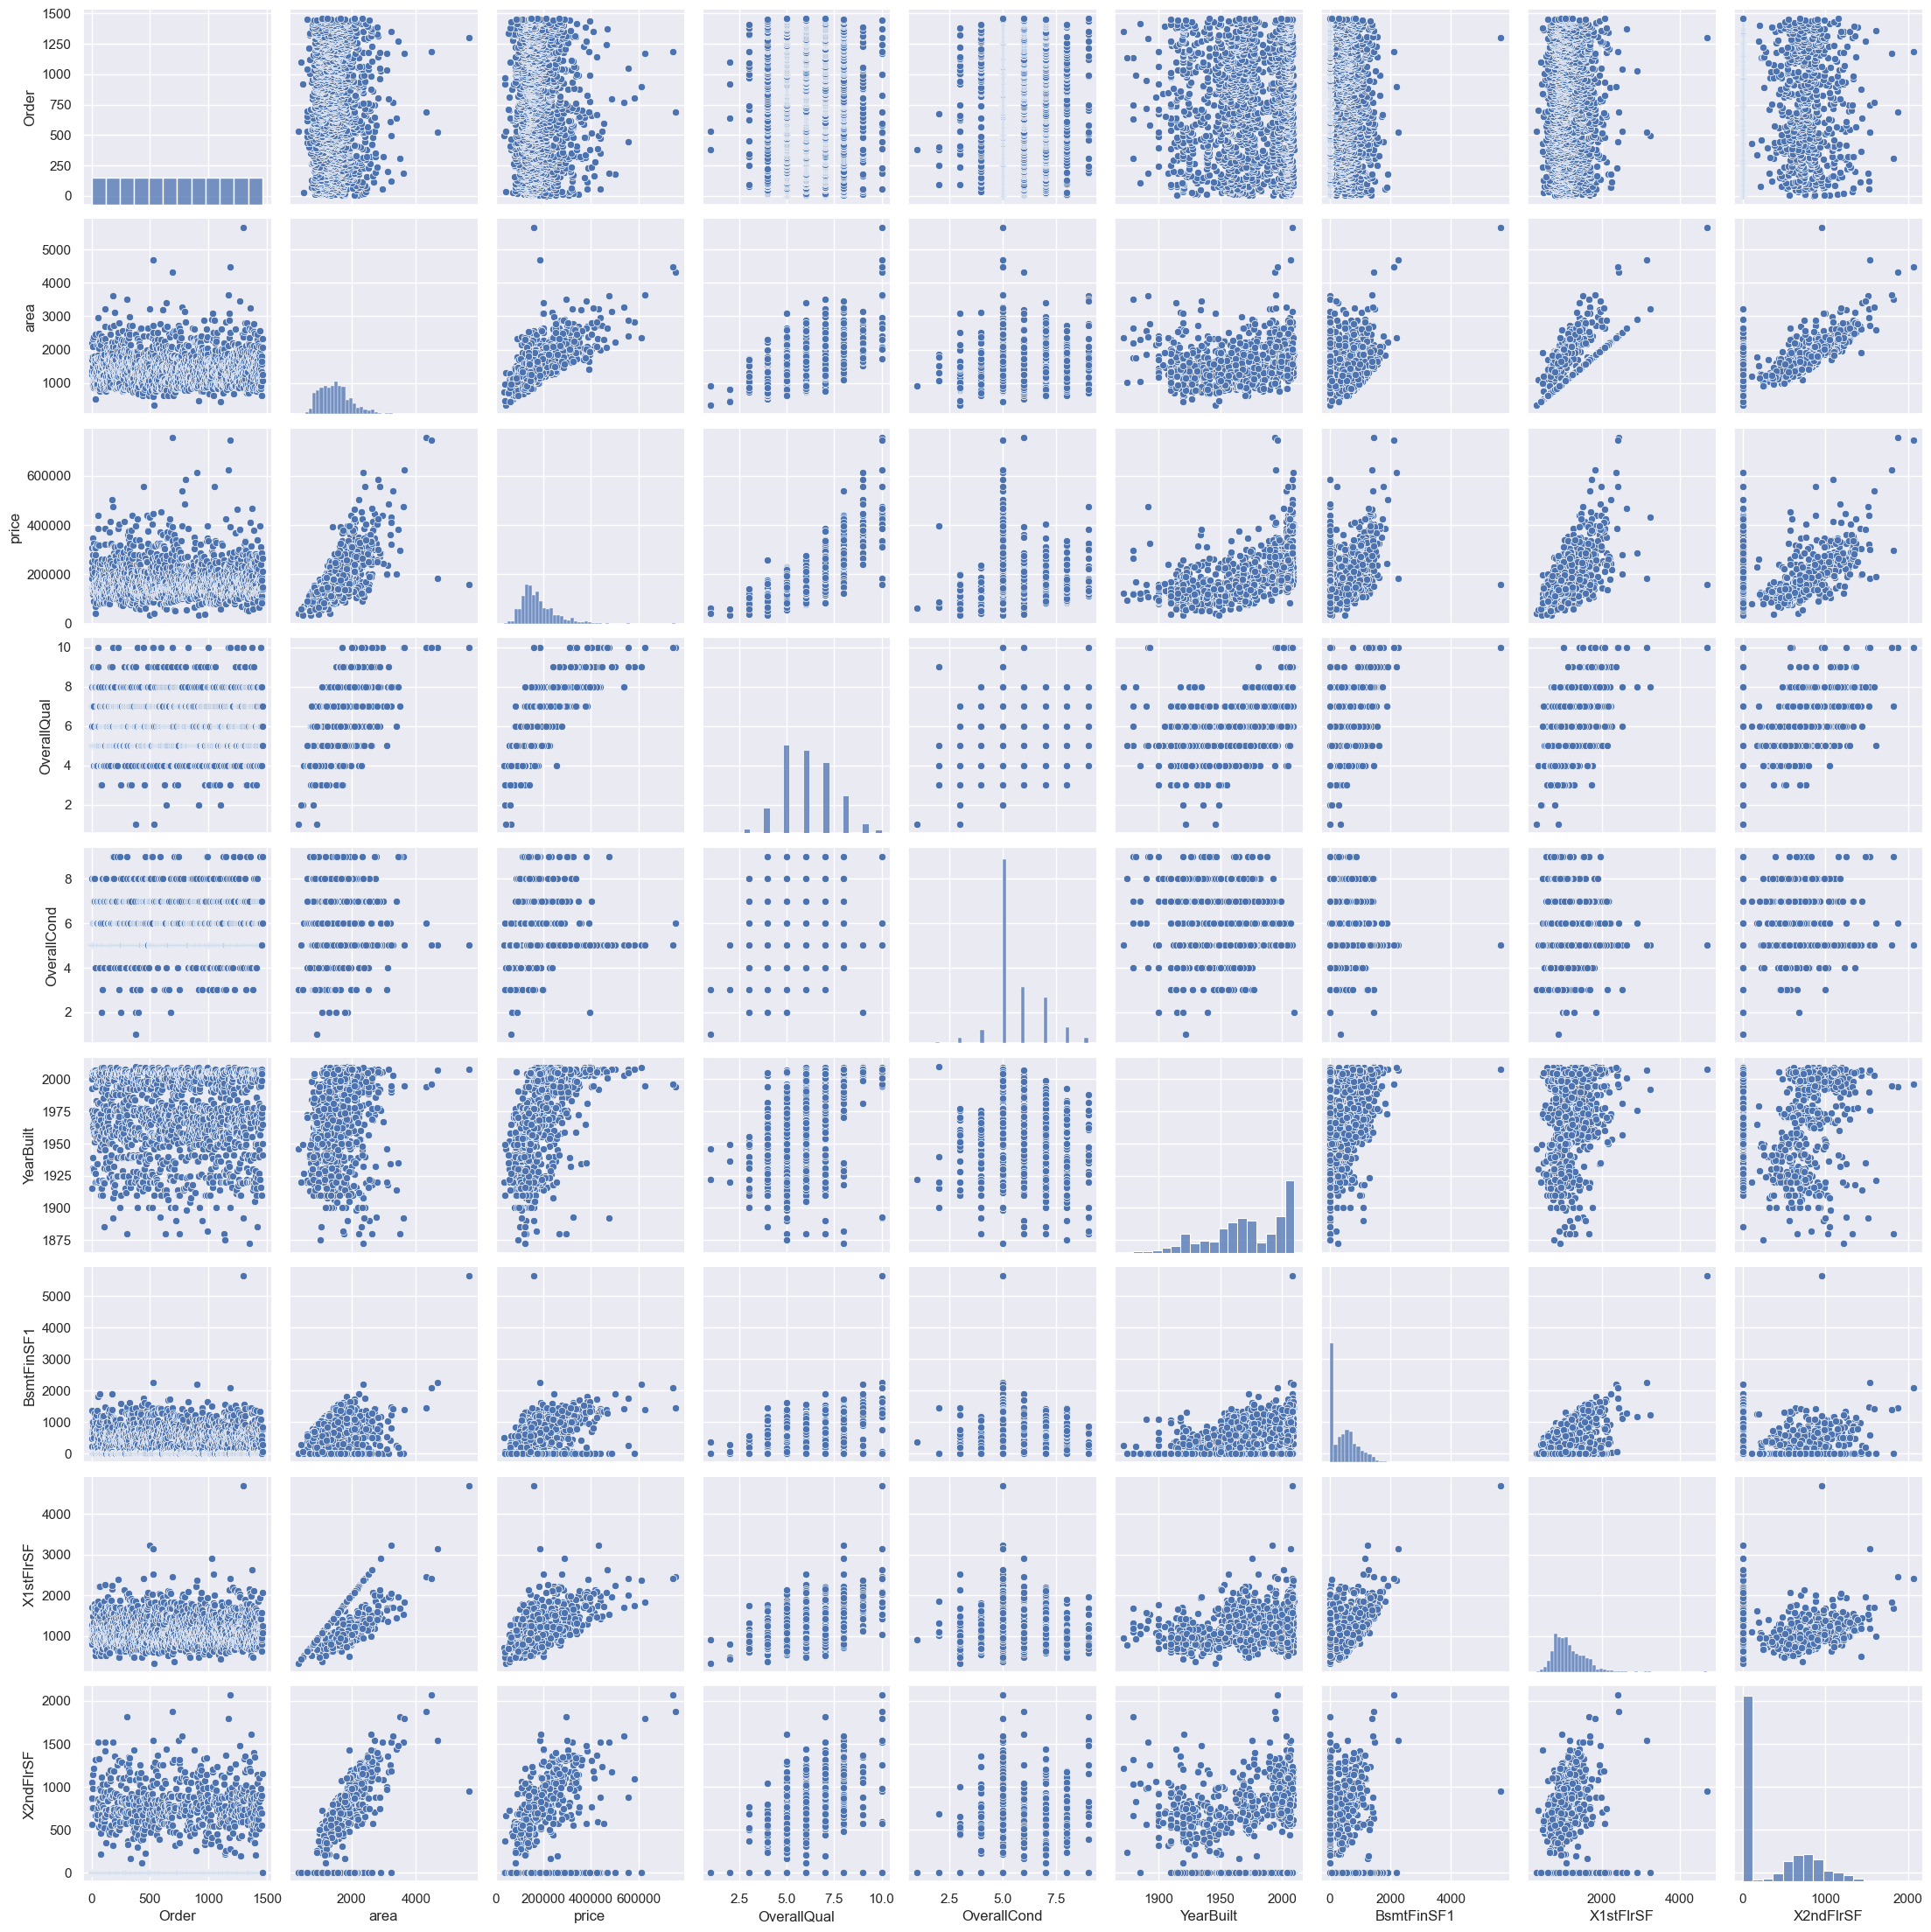

In [32]:
sns.pairplot(data)

In [36]:
# 最小二乗法でそれぞれのモデルを作成
model1 = smf.ols(formula='price ~ YearBuilt', data=data).fit()
model2 = smf.ols(formula='price ~ OverallQual + X1stFlrSF', data=data).fit()
model3 = smf.ols(formula='price ~ YearBuilt + OverallQual + X1stFlrSF', data=data).fit()

In [37]:
# それぞれのAICを計算して表示
print('Model 1 :', model1.aic)
print('Model 2 :', model2.aic)
print('Model 3 :', model3.aic)

Model 1 : 36625.70646748859
Model 2 : 35367.18730733775
Model 3 : 35336.629042057226


In [35]:
# AICの結果、最適なモデルは３つ目の説明変数「YearBuilt・OverallQual・X1stFlrSF」の組み合わせであった。
# 当該モデルの詳細を示す
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     1134.
Date:                Mon, 08 Dec 2025   Prob (F-statistic):               0.00
Time:                        16:20:37   Log-Likelihood:                -17664.
No. Observations:                1460   AIC:                         3.534e+04
Df Residuals:                    1456   BIC:                         3.536e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.172e+05   8.74e+04     -7.065      0.000   -7.89e+05   -4.46e+05
YearBuilt     263.7017     46.021      5.730      0.000     173.428     353.975
OverallQual  3.407e+04   1096.577     31.065      0.000    3.19e+04    3.62e+04
X1stFlrSF      60.6548      3.353     18.090      0.000      54.078      67.232
==============================================================================
Omnibus:                      527.065   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12051.684
Skew:                           1.134   Prob(JB):                         0.00
Kurtosis:                      16.891   Cond. No.                     1.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""